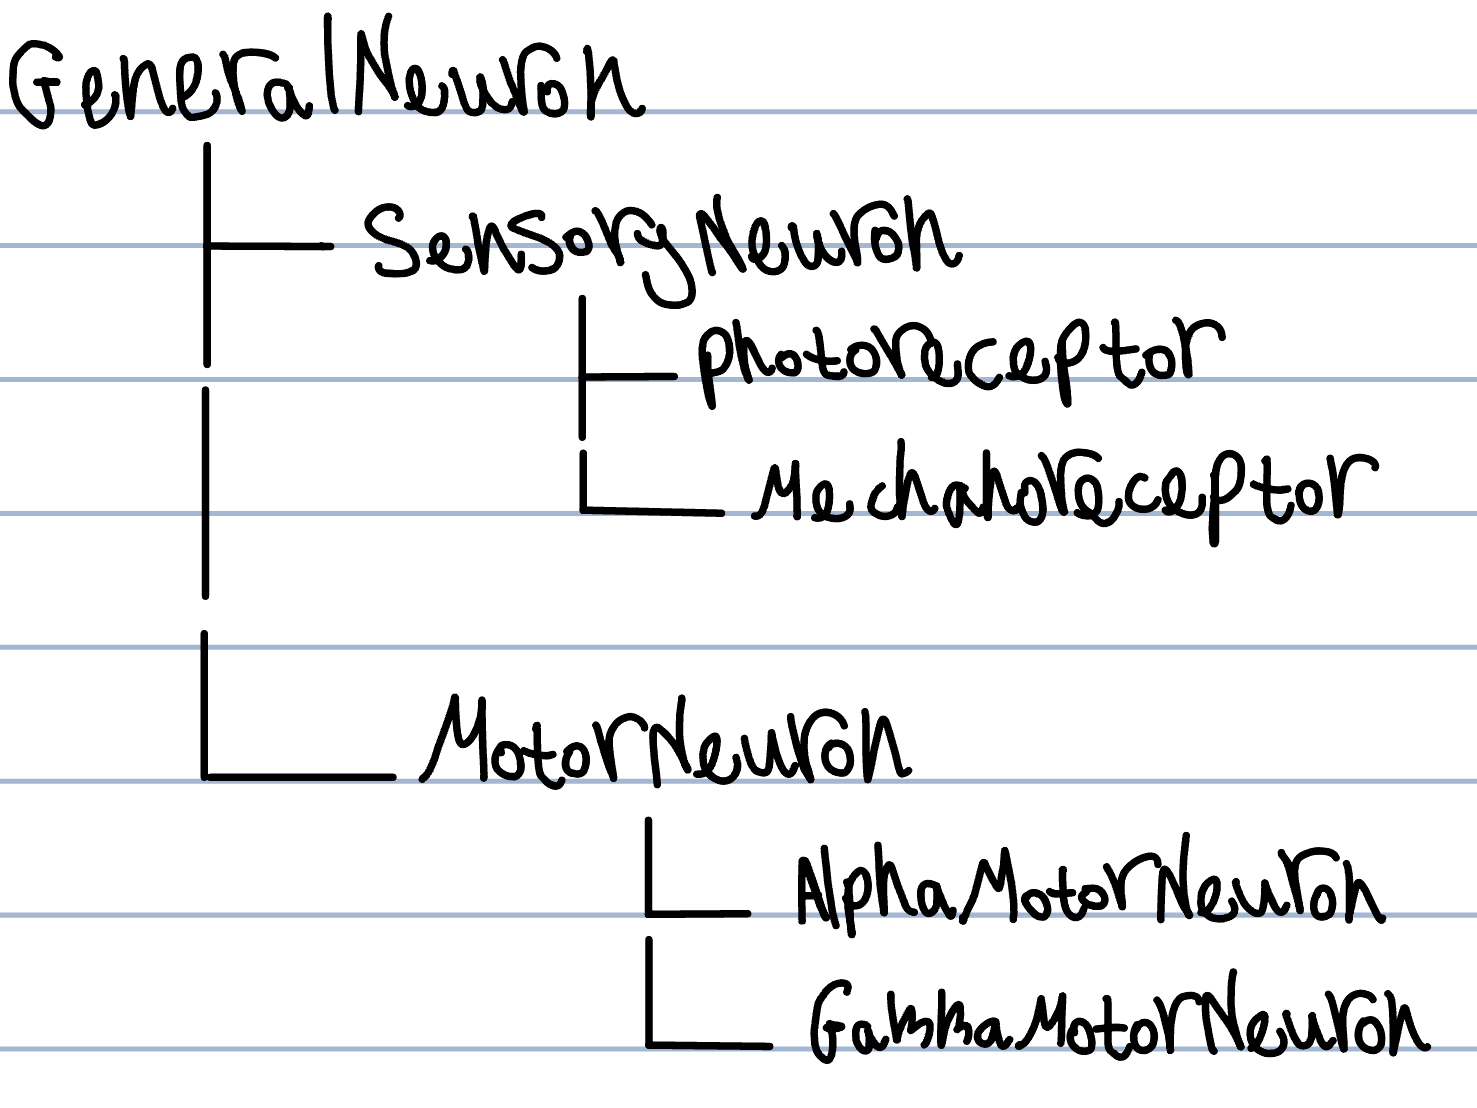

In [3]:
from IPython.display import Image, display
display(Image(filename="./picture_for_mini_project.jpeg"))


In [4]:
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass

class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0,receptor_type=""):
         super().__init__(firing_rate)
         self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        pass

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass

class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")

    def detect_light(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(self, firing_rate, receptor_type="pressure")

    def decect_pressure(self, pressure_level):
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, riting_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def control_skeletal_muscle(self):
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def control_muscle_spindle(self):
        pass    

In [7]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.9 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.

The length of the original array: 100
The length of the sampled array: 28


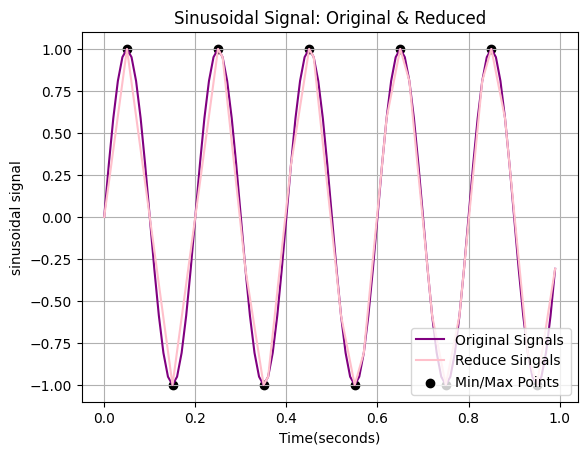

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def calculateExtrime(arr: np.array):
    '''Defines a function that receives an array (arr) and calculates the extreme points (maximum and minimum) in the array'''
    slope = np.diff(arr)
    '''The difference between adjacent values ​​in the array (ie, the "slope" between adjacent points) is calculated.'''
    maxima = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0] + 1
    '''Identifies maximum points by changing the direction of the slope: when the slope increases and then decreases'''
    minima = np.where((slope[:-1] < 0) & (slope[1:] > 0))[0] + 1
    '''Identifies minimum points by changing the direction of the slope: when the slope decreases and then increases.'''
    return maxima, minima

def sinusoidalSignal(arr: np.array):
    steps = 5 
    size = max(len(arr) // steps, 1)
    '''Divide the signal into 5 segments to sample 20% of the points.'''
    maxima, minima = calculateExtrime(arr)
    sampledPoint = np.linspace(0, len(arr) - 1, size, dtype=int)
    '''A list of indices for uniform sampling from the array.'''
    all_indices = np.unique(np.concatenate((sampledPoint, maxima, minima)))
    '''Combine the indices of the sample points with the maximum and minimum points.'''
    return arr[all_indices], all_indices

'''I will now create a time array from 0 to 1 in jumps of 0.01 seconds, with a signal frequency of 5, and a sine signal according to the previous settings of time and jumps.'''
time = np.arange(0, 1, 0.01)
frequency = 5
arr = np.sin(2 * np.pi * frequency * time)

maxima, minima = calculateExtrime(arr)
sampleArr, sampleIndices = sinusoidalSignal(arr)
newTime = time[sampleIndices]

print("The length of the original array:", len(arr))
print("The length of the sampled array:", len(sampleArr))

'''Draw the original in purple and the reduced in pink.
Mark maximum and minimum points (in black).
Add a title, labels to the graphs and a legend.'''

plt.plot(time, arr, label="Original Signals", color='purple')
plt.plot(newTime, sampleArr, label="Reduce Singals ", color='pink')
plt.scatter(time[maxima], arr[maxima], label="Min/Max Points", color='black')
plt.scatter(time[minima], arr[minima], color='black')
plt.title('Sinusoidal Signal: Original & Reduced')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()



In [1]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macos

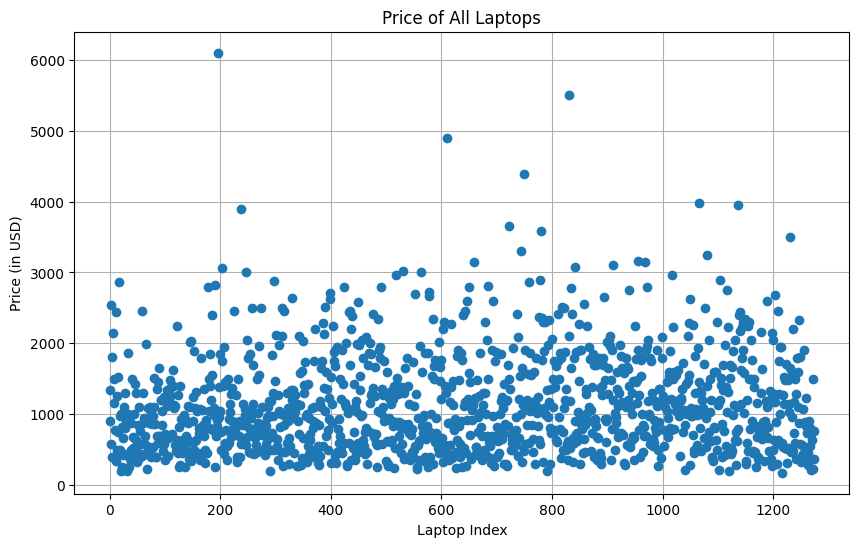

Company with the most expensive laptops on average: Razer ($3346.14)
Average laptop price per company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64
Unique operating systems: ['macos' 'no os' 'windows' 'linux' 'android' 'windows 10 s' 'chrome os']


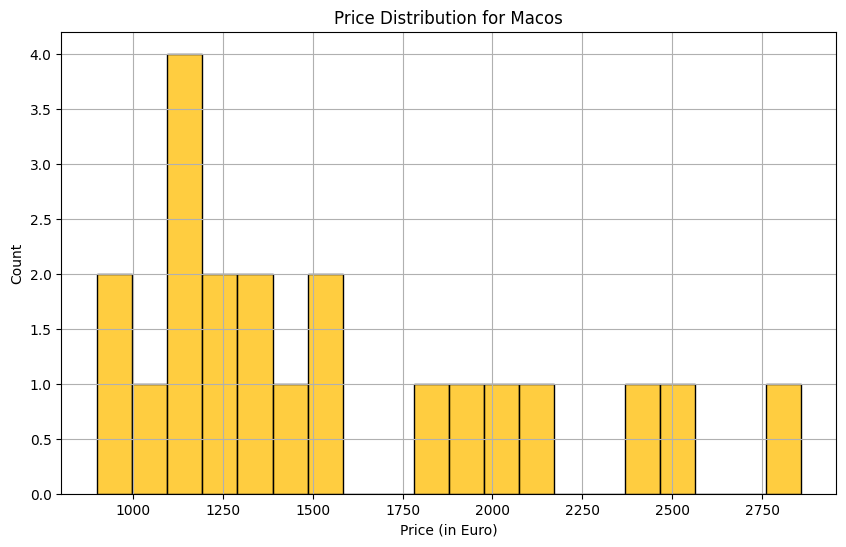

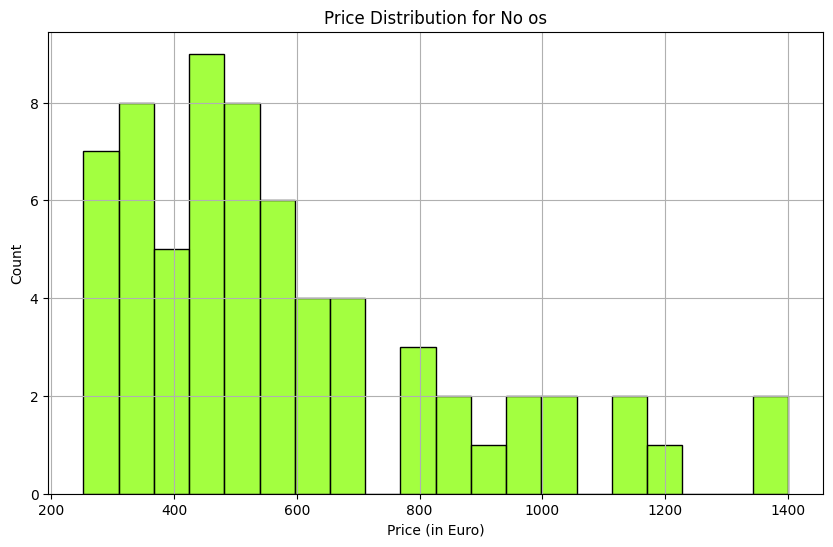

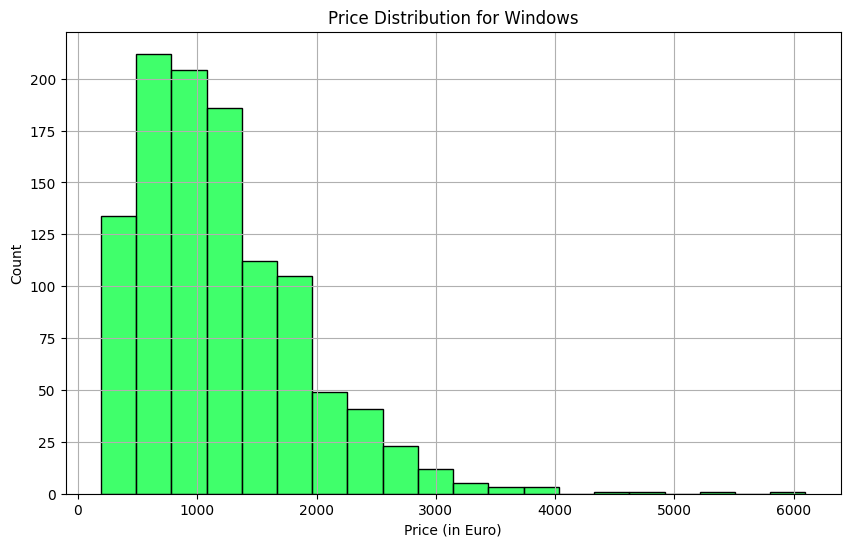

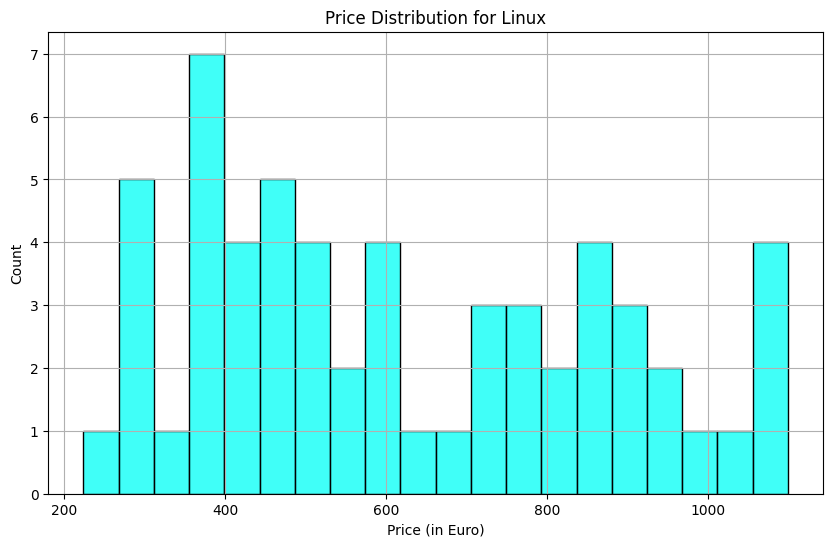

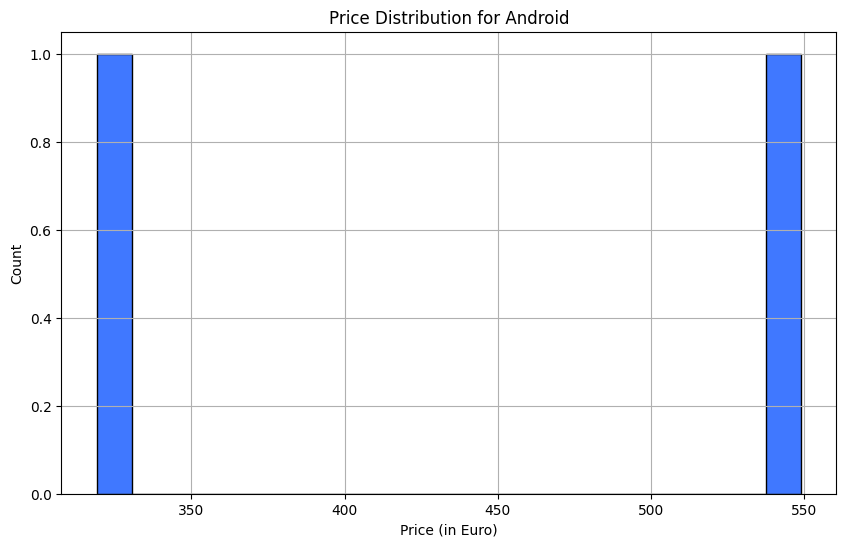

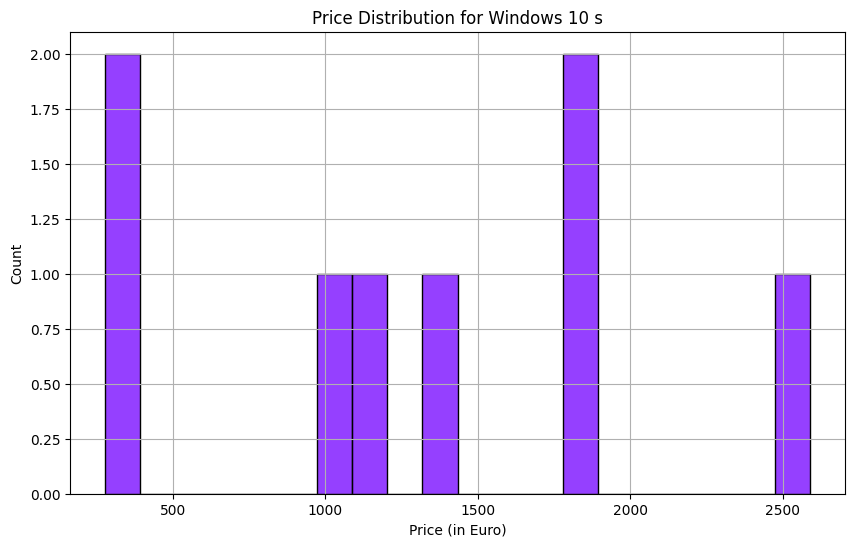

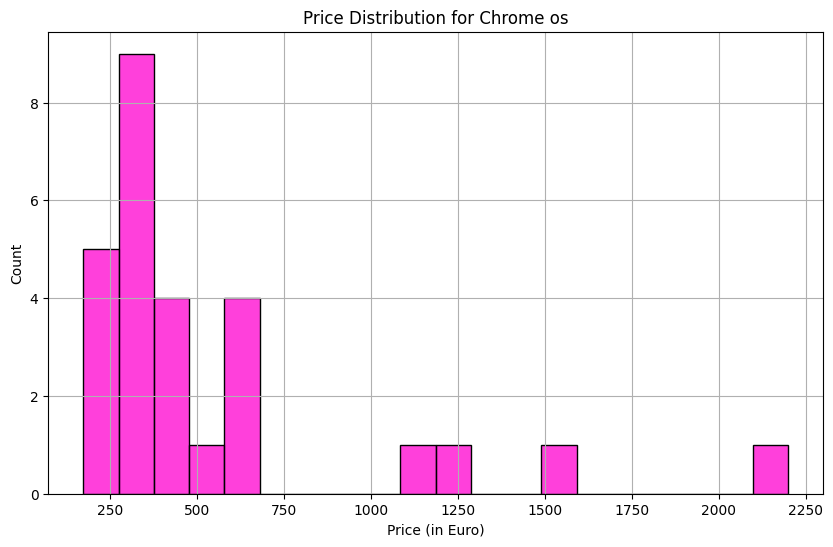

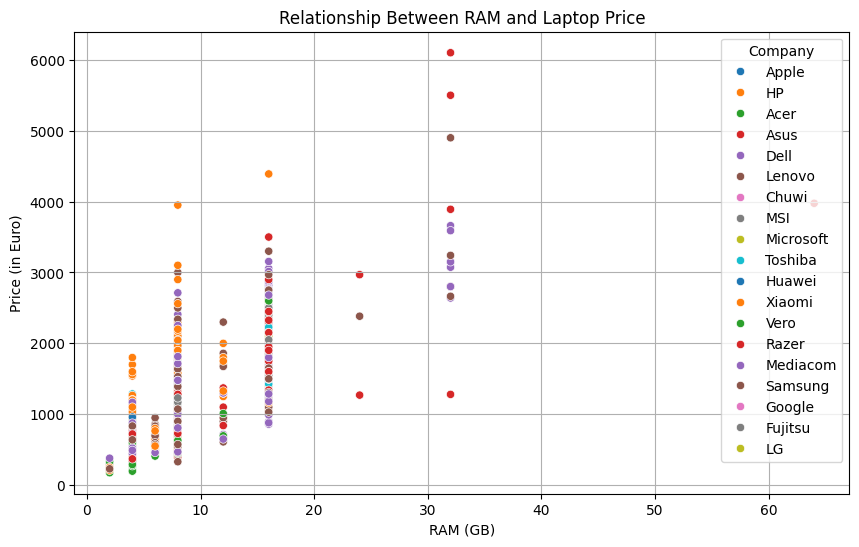

                Memory   Storage Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
datafile = "C:/Users/User/OneDrive/Projects/empy_python_package/laptop_price - dataset.csv"
laptop_data = pd.read_csv(datafile)  # Load the dataset from the given file path into a pandas DataFrame

# Display first few rows to understand the structure of the data
print(laptop_data.head())  # Print the first few rows to check the structure and content of the dataset

# Task 1: Plot the price of all laptops
plt.figure(figsize=(10, 6))  
plt.plot(laptop_data['Price (Euro)'], marker='o', linestyle='')  
plt.title('Price of All Laptops')  
plt.xlabel('Laptop Index')  
plt.ylabel('Price (in USD)')  
plt.grid()  
plt.show()  

# Task 2: Find the company with the most expensive laptops on average
avg_price_per_company = laptop_data.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)  # Group by company and calculate the average price, then sort in descending order
most_expensive_company = avg_price_per_company.idxmax()  # Get the company with the highest average price
most_expensive_avg_price = avg_price_per_company.max()  # Get the maximum average price value

print(f"Company with the most expensive laptops on average: {most_expensive_company} (${most_expensive_avg_price:.2f})")  # Print the most expensive company and its average price
print("Average laptop price per company:")
print(avg_price_per_company)  # Print the average price of laptops per company

# Task 3: Find and standardize the operating systems
laptop_data['OpSys'] = laptop_data['OpSys'].str.lower().replace({  # Standardize the operating system names to lowercase and unify similar OS types
    'windows 10': 'windows',
    'windows 7': 'windows',
    'mac os x': 'macos',
    'macos': 'macos',
    'linux': 'linux',
    'dos': 'dos',
    'no os': 'no os',
    'chrome os': 'chrome os'
})

unique_operating_systems = laptop_data['OpSys'].unique()  # Get the unique operating system types after standardization
print("Unique operating systems:", unique_operating_systems)  # Print the unique operating system names

# Task 4: Plot the distribution of prices for each operating system (separate bar plots)
colors = sns.color_palette('hsv', len(unique_operating_systems))  # Generate a unique color palette for the number of operating systems

for i, os in enumerate(unique_operating_systems):  # Loop through each unique operating system
    plt.figure(figsize=(10, 6))  
    sns.histplot(laptop_data[laptop_data['OpSys'] == os]['Price (Euro)'], kde=False, color=colors[i], bins=20)  # Create a histogram for the prices of laptops with the specific OS
    plt.title(f'Price Distribution for {os.capitalize()}')  # Set the title for each plot with the OS name capitalized
    plt.xlabel('Price (in Euro)')  
    plt.ylabel('Count')  
    plt.grid()  
    plt.show()  

# Task 5: Relationship between RAM and price
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=laptop_data, x='RAM (GB)', y='Price (Euro)', hue='Company', palette='tab10')  # Create a scatter plot showing the relationship between RAM and price, colored by company
plt.title('Relationship Between RAM and Laptop Price')  
plt.xlabel('RAM (GB)')  
plt.ylabel('Price (in Euro)')  
plt.grid()  
plt.show()  

# Task 6: Extract storage type from Memory column
def extract_storage_type(memory):  # Define a function to extract the storage type from the 'Memory' column
    if 'ssd' in memory.lower():
        return 'SSD'  
    elif 'hdd' in memory.lower():
        return 'HDD'  
    elif 'hybrid' in memory.lower():
        return 'Hybrid'  
    elif 'flash' in memory.lower():
        return 'Flash Storage'  
    else:
        return 'Other'  # If none of the above, return 'Other'

laptop_data['Storage Type'] = laptop_data['Memory'].apply(extract_storage_type)  # Apply the function to the 'Memory' column and create a new column 'Storage Type'
print(laptop_data[['Memory', 'Storage Type']].head())  # Print the first few rows of the 'Memory' and 'Storage Type' columns to verify the results

# Save the updated dataset with the new column
laptop_data.to_csv("C:/Users/User/OneDrive/Projects/empy_python_package/laptop_price - dataset.csv", index=False)  # Save the updated DataFrame to a CSV file
